In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:

# Load the CSV file
file_path = "Data/raw/community_issues_dataset_long.csv"
data = pd.read_csv(file_path)

In [20]:
# Drop the 'Category' column
data = data.drop(columns=['Category'])

# Confirm that the column is dropped by displaying the first few rows
print(data.head())


  Issue Name Severity   Frequency Sentiment  \
0     _RARE_     High    Frequent   Neutral   
1     _RARE_   Medium  Occasional   Neutral   
2     _RARE_   Medium  Occasional   Neutral   
3     _RARE_   Medium        Rare   Neutral   
4     _RARE_   Medium  Occasional   Neutral   

                                         Letter Text  
0  Dear Council,\n\nI am writing to formally rais...  
1  Dear Council,\n\nI am writing to formally rais...  
2  Dear Council,\n\nI am writing to formally rais...  
3  Dear Council,\n\nI am writing to formally rais...  
4  Dear Council,\n\nI am writing to formally rais...  


Distribution for Sentiment:
Sentiment
Positive    43626
Neutral     41002
Negative    12372
Name: count, dtype: int64

----------------------------------------


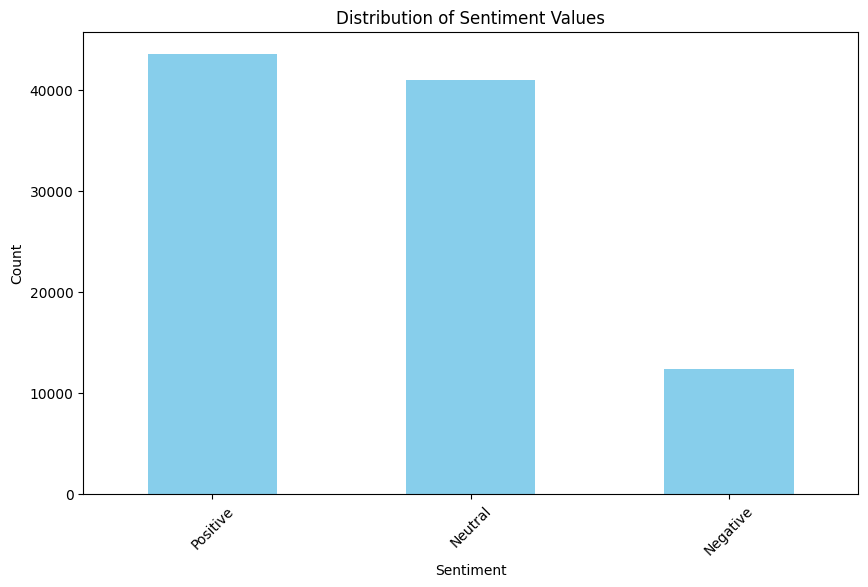

Distribution for Severity:
Severity
Low       41830
Medium    37396
High      17774
Name: count, dtype: int64

----------------------------------------


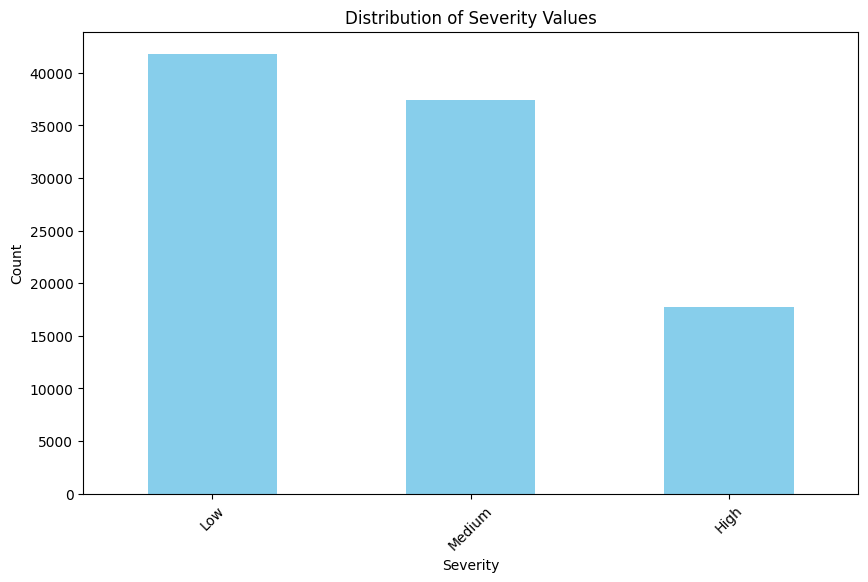

In [22]:


# List of columns you want to check distributions for
columns_to_check = ['Sentiment', 'Severity']

# Loop through each column and check the distribution
for column in columns_to_check:
    # Print the distribution of the column
    print(f"Distribution for {column}:")
    print(data[column].value_counts())
    print("\n" + "-"*40)  # Separator for readability

    # Plot the distribution for each column
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column} Values')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import pandas as pd

# Find the minimum count of the "Sentiment" and "Severity" distributions
min_sentiment_count = data['Sentiment'].value_counts().min()
min_severity_count = data['Severity'].value_counts().min()

# Find the overall minimum count
min_count = min(min_sentiment_count, min_severity_count)

# Subset the dataset by randomly sampling from each combination of Sentiment and Severity
subset_data = data.groupby(['Sentiment', 'Severity']).apply(lambda x: x.sample(min_count))

# Reset the index after applying the grouping and sampling
subset_data = subset_data.reset_index(drop=True)

# Display the subset data
print(subset_data.head())

# Optionally, check the distribution of the subset dataset
print(subset_data['Sentiment'].value_counts())
print(subset_data['Severity'].value_counts())
